### Import packages

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [25]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Laliga_match_details/'
file_list = os.listdir(path)

Laliga_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Laliga_matches = pd.concat([Laliga_matches, pd.read_json(filepath, lines=True)], axis=0)

In [26]:
Laliga_matches.head(5)

,match_general_info,team_details,event_details
0,"{'day': 'Fri', 'date': '12/11/20', 'starttime'...","{'home': {'name': 'Real Valladolid CF', 'rank'...","{'home': {'goal': [{'scorer': 'Shon Weissman',..."
1,"{'day': 'Sat', 'date': '12/12/20', 'starttime'...","{'home': {'name': 'Valencia CF', 'rank': '14',...","{'home': {'goal': [{'scorer': 'Carlos Soler', ..."
2,"{'day': 'Sat', 'date': '12/12/20', 'starttime'...","{'home': {'name': 'Getafe CF', 'rank': '17', '...","{'home': {'card': [{'name': 'Mauro Arambarri',..."
3,"{'day': 'Sat', 'date': '12/12/20', 'starttime'...","{'home': {'name': 'SD Huesca', 'rank': '19', '...",{'home': {'goal': [{'scorer': 'Javi Ontiveros'...
4,"{'day': 'Sat', 'date': '12/12/20', 'starttime'...","{'home': {'name': 'Real Madrid', 'rank': '3', ...","{'home': {'goal': [{'scorer': 'Casemiro', 'goa..."


In [27]:
print('number of matches from season 2010-2011 to the date the data scraped:', len(Laliga_matches))

number of matches from season 2010-2011 to the date the data scraped: 5005


### Match general information analysis
#### 1. Observe initial form

In [28]:
match_general_info = pd.DataFrame(Laliga_matches['match_general_info'].to_list())

In [29]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Fri,12/11/20,9:00 PM,Nuevo José Zorrilla,None,Adrián Cordero Vega,3:2
1,Sat,12/12/20,2:00 PM,Mestalla,None,Carlos del Cerro Grande,2:2
2,Sat,12/12/20,4:15 PM,Coliseum Alfonso Pérez,None,Juan Martínez Munuera,0:1
3,Sat,12/12/20,6:30 PM,El Alcoraz,None,Mario Melero López,1:0
4,Sat,12/12/20,9:00 PM,Estadio Alfredo Di Stéfano,None,Mateu Lahoz,2:0


In [30]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 1
stadium 0
attendance 501
referee 4
score 0


Attendance data need to be observed after converting string type date to datetype date to check why there are many null values.

#### 2. Data pre-processing

In [31]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [32]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2020-12-11,21:00:00,Nuevo José Zorrilla,None,Adrián Cordero Vega,3:2,3,2
1,Sat,2020-12-12,14:00:00,Mestalla,None,Carlos del Cerro Grande,2:2,2,2
2,Sat,2020-12-12,16:15:00,Coliseum Alfonso Pérez,None,Juan Martínez Munuera,0:1,0,1
3,Sat,2020-12-12,18:30:00,El Alcoraz,None,Mario Melero López,1:0,1,0
4,Sat,2020-12-12,21:00:00,Estadio Alfredo Di Stéfano,None,Mateu Lahoz,2:0,2,0


In [33]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2020-12-11,21:00:00,Nuevo José Zorrilla,None,Adrián Cordero Vega,3:2,3,2
1,Sat,2020-12-12,14:00:00,Mestalla,None,Carlos del Cerro Grande,2:2,2,2
2,Sat,2020-12-12,16:15:00,Coliseum Alfonso Pérez,None,Juan Martínez Munuera,0:1,0,1
3,Sat,2020-12-12,18:30:00,El Alcoraz,None,Mario Melero López,1:0,1,0
4,Sat,2020-12-12,21:00:00,Estadio Alfredo Di Stéfano,None,Mateu Lahoz,2:0,2,0
...,...,...,...,...,...,...,...,...,...
4377,Wed,2021-04-21,21:00:00,Manuel Martínez Valero,None,José María Sánchez Martínez,1:1,1,1
4378,Wed,2021-04-21,22:00:00,Nuevo Mirandilla,None,Mateu Lahoz,0:3,0,3
4379,Thu,2021-04-22,19:00:00,Civitas Metropolitano,None,José Luis Munuera Montero,2:0,2,0
4611,Sat,2023-05-20,16:15:00,San Mamés,None,Mario Melero López,2:1,2,1


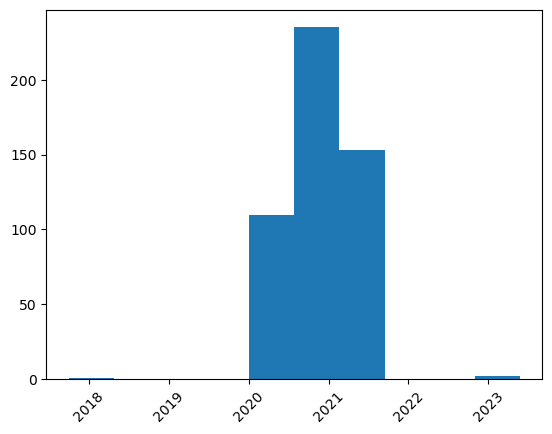

In [34]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most of null cases for the attendance locate season 2020-2021, and it could be because of the pendemic. <br>
There were many games with no attendance during the pendamic, so 0 will replace null values for attendance. <br>
For other cases, average number of attendance for the stadium will replace null values.

Null value attendance of matches bewtween 05.01.2020 and 07.01.2021 will be replaced with 0.

In [35]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

,date,stadium
2485,2017-10-01,Spotify Camp Nou
4611,2023-05-20,San Mamés
4627,2023-05-25,Mallorca Son Moix


In [36]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

In [37]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2017-10-01 66998
2023-05-20 34519
2023-05-25 13528


As we can see above, missing attendance of matches after 07.01.2021 (no pendamic period) are filled with averages.

In [38]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 4
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### 3. Data Quality Check - Check if there are inappropriate values
##### - categorical data

In [39]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,5005,5005,5005,5001,5005
unique,7,33,41,55,55
top,Sun,21:00:00,Ramón Sánchez-Pizjuán,Mateu Lahoz,1:1
freq,2009,820,251,253,565


In [40]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,5005
mean,2017-02-06 19:47:57.842157824
min,2010-08-28 00:00:00
25%,2013-10-31 00:00:00
50%,2017-02-17 00:00:00
75%,2020-07-02 00:00:00
max,2023-09-03 00:00:00


In [41]:
match_general_info['day'].value_counts(dropna=False)

Sun    2009
Sat    1762
Mon     345
Fri     337
Wed     259
Thu     150
Tue     143
Name: day, dtype: int64

In [42]:
match_general_info['date'].value_counts(dropna=False)

2011-05-21    15
2021-04-21    12
2011-05-15    10
2023-06-04    10
2012-05-05    10
              ..
2021-09-27     1
2021-10-01     1
2013-02-11     1
2014-10-17     1
2016-01-04     1
Name: date, Length: 1659, dtype: int64

In [43]:
match_general_info['starttime'].value_counts(dropna=False)

21:00:00    820
18:30:00    496
22:00:00    412
20:00:00    373
16:15:00    356
20:45:00    283
12:00:00    278
18:00:00    274
16:00:00    270
19:00:00    241
17:00:00    240
14:00:00    203
20:30:00    140
21:30:00    130
19:30:00    130
13:00:00    115
18:15:00     94
22:05:00     29
19:45:00     19
22:15:00     18
20:15:00     18
23:00:00     16
17:30:00     13
22:30:00      7
19:50:00      7
19:15:00      6
17:50:00      4
21:15:00      4
18:45:00      3
16:45:00      3
16:30:00      1
21:45:00      1
00:00:00      1
Name: starttime, dtype: int64

In [44]:
match_general_info['stadium'].value_counts(dropna=False)

Ramón Sánchez-Pizjuán                251
Mestalla                             250
San Mamés                            249
Spotify Camp Nou                     248
Coliseum Alfonso Pérez               231
La Cerámica                          229
RCDE Stadium                         229
Santiago Bernabéu                    224
Abanca Balaídos                      211
Ciutat de València                   208
El Sadar                             175
Nuevo Los Cármenes                   173
Anoeta                               173
Benito Villamarín                    156
Campo de Fútbol de Vallecas          154
La Rosaleda                          153
Vicente Calderón                     133
Ipurua                               132
Mallorca Son Moix                    117
Mendizorroza                         117
Nuevo José Zorrilla                  115
Civitas Metropolitano                115
Abanca Riazor                        114
Manuel Martínez Valero                97
Reale Arena     

In [45]:
match_general_info['referee'].value_counts(dropna=False)

Mateu Lahoz                       253
Carlos del Cerro Grande           238
Estrada Fernández                 219
Jesús Gil Manzano                 217
González González                 202
Alejandro Hernández Hernández     201
Juan Martínez Munuera             183
Undiano Mallenco                  178
Iglesias Villanueva               175
José María Sánchez Martínez       164
Mario Melero López                161
De Burgos Bengoetxea              159
Álvarez Izquierdo                 151
Santiago Jaime Latre              150
Carlos Clos Gómez                 146
David Fernández Borbalán          143
José Luis Munuera Montero         136
Pablo González Fuertes            121
Javier Alberola Rojas             116
Carlos Velasco Carballo           110
Fernando Teixeira Vitienes        100
Eduardo Prieto Iglesias            96
José Antonio Teixeira Vitienes     96
Guillermo Cuadra Fernández         94
Pedro Jesús Pérez Montero          89
César Soto Grado                   84
César Muñiz 

##### - numerical data


In [46]:
match_general_info.describe()

,attendance,home_score,away_score
count,5005.000000,5005.000000,5005.000000
mean,24817.906294,1.545854,1.125475
std,19670.515497,1.338324,1.137895
min,0.000000,0.000000,0.000000
25%,12100.000000,1.000000,0.000000
50%,19270.000000,1.000000,1.000000
75%,34711.000000,2.000000,2.000000
max,99354.000000,10.000000,8.000000
